# K - Means Clustering

- unsupervised learning yani label yok clustering yapilir.
- Label olmayan dataları gruplayarak etiketleme yapmaya calisir.


Bazi adimlari vardir:
   - 1) Key degerini sec
   - 2) Random centroid ata
   - 3) Data pointleri centroide göre uzakliga(euclidean distance) bak ve cluster(gruplama) yap.
   -  4) Bu centroidlerin yeri degismeyene kadar yeni centroid bul.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#create dataset

#class1
x1=np.random.normal(25,5,1000) 
y1=np.random.normal(25,5,1000)

#class2
x2=np.random.normal(55,5,1000) 
y2=np.random.normal(60,5,1000)

#class3
x3=np.random.normal(55,5,1000) 
y3=np.random.normal(15,5,1000)

- normal : gaussian, bin tane degerim olacak, bu bin tane degerimin ortalamasini alinca sonuc 25 cikacak ama benim datamin %66sida 30 ile (25+5) 20 (25-5) arasinda olacak, yani datalarimin %66'si 20 ile 30 arasinda olacak. 

In [9]:
x = np.concatenate((x1,x2,x3), axis=0) #axis=0 yukarıdan assagiya birlestir

In [10]:
y= np.concatenate((y1,y2,y3), axis=0)

In [11]:
dictionary={"x":x,"y":y}

In [12]:
data=pd.DataFrame(dictionary)

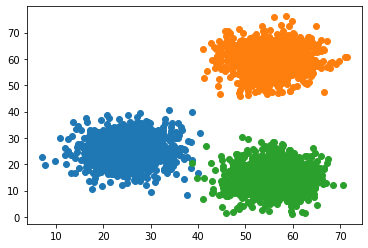

In [14]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

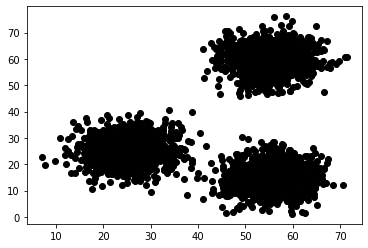

In [16]:
#k-means algoritmasi bunu gorecek
plt.scatter(x1,y1, color="black")
plt.scatter(x2,y2, color="black")
plt.scatter(x3,y3, color="black")
plt.show()

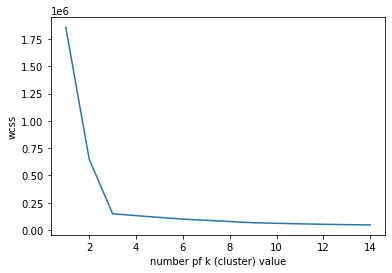

In [19]:
#k-means
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) # inertia_: her bir k degeri icin wcss degerini bul 
plt.plot(range(1,15),wcss)
plt.xlabel("number pf k (cluster) value")
plt.ylabel("wcss")
plt.show()

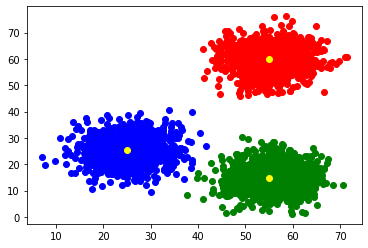

In [27]:
# k=3 elbow yaptigi yer o yuzden k'yi 3 sectim
kmeans2=KMeans(n_clusters=3)
clusters=kmeans2.fit_predict(data)
#datami fit et, bu fit ettigim datayi al modelim uzerinde uygula ve clusterlarimi olustur.

data["label"]=clusters #labellari ekledim.

plt.scatter(data.x[data.label==0],data.y[data.label==0],color="red")
plt.scatter(data.x[data.label==1],data.y[data.label==1],color="green")
plt.scatter(data.x[data.label==2],data.y[data.label==2],color="blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
plt.show()

In [29]:
#sari noktalar centroidlerdir.